<a href="https://colab.research.google.com/github/joeyee/Spectral_Analysis/blob/main/Fourier_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I. Prove Discrete Fourier transformation and its inverse
$$
X[k]=\sum_{n=0}^{N-1}x[n]e^{-j2\pi nk/N}   \quad\quad (1)
$$
证傅里叶逆变换
$$
\begin{split}
\sum_{k=0}^{N-1}X[k]e^{j2\pi nk/N} &= \sum_{k=0}^{N-1}\left(\sum_{m=0}^{N-1}x[m]e^{-j2\pi mk/N}\right)e^{j2\pi nk/N} \\
&=\sum_{m=0}^{N-1}x[m]\sum_{k=0}^{N-1}e^{-j2\pi(m-n)k/N} \quad\quad(2)\\
&= \sum_{m=0}^{N-1}x[m] \sum_{k=0}^{N-1} \delta(m-n) \\
&= N x[n]
\end{split} 
$$
由于
$$
\sum_{n=0}^{N-1}=e^{-j2\pi n/N} = 0 \quad\quad(3) 
$$
故仅当 $m=n$ 时（2）式的右半部分才有值。所以有：
$$
x[n] = \frac{1}{N}\sum_{k=0}^{N-1}X[k]e^{j2\pi nk/N}  \quad\quad(4)
$$

# II. Prove Parseval's theorem 能量守恒
$$
{\displaystyle {\frac {1}{N}}\sum _{k=0}^{N-1}|X[k]|^{2}={\frac {1}{N}}\sum _{k=0}^{N-1}X[k]\cdot X^{*}[k]={\frac {1}{N}}\sum _{k=0}^{N-1}\left[\sum _{n=0}^{N-1}x[n]\,\exp \left(-j{\frac {2\pi }{N}}k\,n\right)\right]\,X^{*}[k]={\frac {1}{N}}\sum _{n=0}^{N-1}x[n]\left[\sum _{k=0}^{N-1}X^{*}[k]\,\exp \left(-j{\frac {2\pi }{N}}k\,n\right)\right]={\frac {1}{N}}\sum _{n=0}^{N-1}x[n](N\cdot x^{*}[n])=\sum _{n=0}^{N-1}|x[n]|^{2}}
$$
因此在频域规范$X[k]$， 使$\hat{X}[k]=X[k]/\sqrt{N}$, 那么 
$$
\sum _{k=0}^{N-1}|\hat{X}[k]|^{2}=\sum _{n=0}^{N-1}|x[n]|^{2}
$$

# III. How to understand the negative frequency in the DFT.
1. 由于$x[n]$是实数序列: 负向频率跟正向频率共轭对称
$$ X[-k] = \sum_{n=0}^{N-1}x[n]e^{j2\pi nk/N} = \left(\sum_{n=0}^{N-1}x[n]e^{-j2\pi nk/N}\right)^*=X^*[k]$$
2. 由于$X[k]$是周期序列 $X[N-k]=X[-k]$,所以序列$X[k]$关于$N/2$共轭对称，$N/2, ..., N-1$对应的为负向频率。
$$
\begin{split}
&X[0, 1, 2, ...N/2-1, N/2, N/2+1,   ..., N-1] =\\
&X[0, 1, 2, ...N/2-1, N/2, -(N/2-1),..., -1 ]
\end{split}
$$
4.$X[0]/N = \frac{1}{N}\sum_{n=0}^{N-1}x[n]$, 零频率对应平均值（直流分量）。
前半部分$X[1,...,N/2-1]$与后半部分$X[N/2+1, ..., N-1]$**共轭对称，幅值相同，相位反相。他们分别对应频率点上的一半能量**。注意 $X[1]$与$X[N-1]$(也就是$X[-1]$)共同对应基频为1的波的能量，假如基波中的时域表示为 $a_1 sin(2\pi f_1t) + b_1 cos(2\pi f_1t)$,则$X[1] = a_1/2 - jb_1/2$, $X[N-1] = a_1/2 + jb_1/2$。

$$Amplitude |X[1]| = \sqrt{a^2+b^2}/2, \\Phase(X[1]) = atan2\left(Im(X[1]), Re(X[1])\right) =atan2(-b_1, a_1)$$

#IV. Example
比如频点1上的能量分布在$k=1$和$k=N-1$上面。
若间隔为$\Delta t$, 则采样频率为$f_s = 1/\Delta t$ 一个周期的采样点数为$N$, 那么时域周期为$T=N\Delta t$.频率间隔为$\Delta f =  1/T = \frac{1}{N\Delta t} = f_s/N$. DFT的基频为$f_1 = \Delta f$
假设信号由仅有基频正余弦构成：
$$
\begin{split}
x[n] &= x[n\Delta t] \\ 
&= a\cos\left(2\pi f_1 n \Delta t \right) + b\sin\left(2\pi f_1 n\Delta t\right) \\
&= a\cos\left(2\pi  n \Delta t/(N\Delta t) \right) + b\sin\left(2\pi  n\Delta t/(N\Delta t)\right)\\
&= a\cos\left(2\pi n/N \right) + b\sin\left(2\pi n/N\right)
\end{split}
$$

$$
\begin{split}
X[1]   &= \sum_{n=0}^{N-1}x[n]e^{-j2\pi nk/N} \\
       &= \sum_{n=0}^{N-1}\left(a\cos\left(2\pi n/N \right) + b\sin\left(2\pi n/N\right)\right)e^{-j2\pi nk/N}\\
       &= \sum_{n=0}^{N-1} \left(a/2\left(e^{j2\pi nk/N}+e^{-j2\pi nk/N}\right)+b/(2j)\left(e^{j2\pi nk/N}-e^{-j2\pi nk/N}\right)\right)e^{-j2\pi nk/N} \\
       &= a\frac{N}{2} - jb\frac{N}{2}
\end{split}
$$

这里使用了 $\sum_{n=0}^{N-1}e^{-j4\pi nk/N} = 0$的性质。

同理
$$
\begin{split}
X[N-1] &= \sum_{n=0}^{N-1}x[n]e^{-j2\pi nk/N} \\
       &= \sum_{n=0}^{N-1}\left(a\cos\left(2\pi n/N \right) + b\sin\left(2\pi n/N\right)\right)e^{j2\pi nk/N} \\
       &= \sum_{n=0}^{N-1} \left(a/2\left(e^{j2\pi nk/N}+e^{-j2\pi nk/N}\right)+b/(2j)\left(e^{j2\pi nk/N}-e^{-j2\pi nk/N}\right)\right)e^{j2\pi nk/N} \\
       &= a\frac{N}{2} + jb\frac{N}{2}
\end{split}
$$

因此：
时域的基频的正弦分量的振幅为：$a = X[1]*2/N$, 余弦分量的振幅为 $b=X[1]*2/N$.
其实也可以看出N点DFT变化的有效成分集中在$[0,1,...,N/2]$之上。关注着前半部分的频率分量即可$（0,f_s/2）$.

注意：
SciPyFFT的执行速度最快！
Note that the built-in FFT functions are much faster and easier to use, especially when using the SciPy version. Here are the results for comparison:
• Implemented DFT: 120 ms
• Implemented FFT: 16.9 ms • NumPyFFT:42.3μs
• SciPyFFT:12.6μs

#V. Reference
在这本书上看到一个非常有意思的内容。频谱上的幅值跟正弦波的振幅直接对应。
[PythonKong2020]Q. Kong, T. Siauw, and A. M. Bayen. Python Programming and Numerical Methods: A Guide for Engineers and Scientists. Academic Press, 2020.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

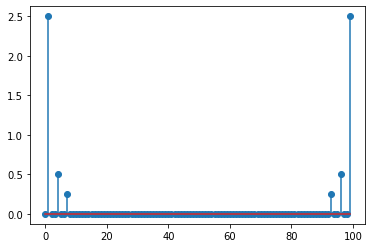

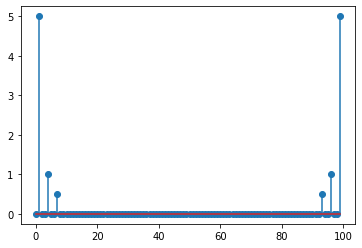

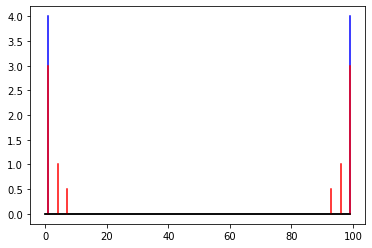

In [ ]:
'''
Test DFT, FFT algorithm based on the book of
Python Programming and Numerical Methods.
A Guide for Engineers and Scientists-Qingkai KongBOOK_2021.pdf

'''
import numpy as np
import matplotlib.pyplot as plt

def DFT(x):
    """
    Function to calculate the discrete Fourier Transform of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    Xk= np.dot(e,x)

    e1= np.exp(-2j*np.pi*n/N)
    X1= np.sum(np.dot(e1,x))
    X0= np.sum(x)

    Fk = np.fft.fft(x)
    return Xk

if __name__=='__main__':

    # N=5
    # fsum = 0
    # dn = np.arange(0,N,1)
    # fsum = np.sum(np.exp(-2j*np.pi*dn/N))
    # print(np.abs(fsum))
    # sampling rate
    sr = 100
    # sampling interval
    ts = 1.0 / sr
    t = np.arange(0, 1, ts)
    N = len(t)
    freq = 1.
    x =  3 * np.sin(2 * np.pi * freq * t)
    x+=  4 * np.cos(2 * np.pi * freq * t)
    freq = 4
    x += 1 * np.sin(2 * np.pi * freq * t)
    freq = 7
    x += 0.5 * np.sin(2 * np.pi * freq * t)

    fs = sr
    f  = np.arange(0,fs,sr/N)
    Fx = DFT(x)
    plt.stem(f,np.abs(Fx)/N)
    plt.figure()
    #Normalize to see the amplitude
    plt.stem(f,np.abs(Fx/(N/2)))
    cos_amplitude = np.abs(np.real(Fx/(N/2)))
    sin_amplitude = np.abs(np.imag(Fx/(N/2)))
    plt.figure()
    plt.stem(f, cos_amplitude, 'b', markerfmt=" ", basefmt="k-")
    plt.stem(f, sin_amplitude, 'r', markerfmt=" ", basefmt="k-")
    plt.show()
    print()